In [1]:
import numpy as np
import pandas as pd #Construct dataframes
from tqdm import tqdm #Progress Bar
import re #Regular expression matching to help with data cleaning

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("rainbow")
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
phoenix45 = pd.read_csv('phoenix45.csv')
phoenix456= pd.read_csv('phoenix456.csv')

In [3]:
#Import all the Housing data
phoenixhomes = pd.concat([phoenix45, phoenix456])
phoenixhomes['url'] = 0
fortworthhomes = pd.read_csv('fortworth.csv')
fortworthhomes['url'] = 0
austinhomes = pd.read_csv('austinhomes.csv')
portlandhomes = pd.read_csv('portland.csv')
portlandhomes['url']=0
atlantahomes = pd.read_csv('atlantahomes.csv')
raw = pd.concat([atlantahomes, austinhomes, fortworthhomes, phoenixhomes, portlandhomes])
raw.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,type,hoa,tax,apprec,url
0,NaN,atlanta,30311,3.0,3.0,1800,1980.0,159900,"['""zestimate"":153542']","['""rentZestimate"":1250']",single family,[],"2017 $679 +29.7% $16,560 --","$173,134 (+12.8 %)",https://www.zillow.com/homedetails/2152-Maxwel...
1,NaN,atlanta,30331,5.0,3.0,3087,2005.0,234900,"['""zestimate"":231819']","['""rentZestimate"":1911']",single family,"['HOA Fee"",""factValue"":""$33']","2017 $1,494 +18.8% $51,760 --","$247,838 (+6.9 %)",https://www.zillow.com/homedetails/2431-Gilber...
2,NaN,atlanta,30331,NaN,NaN,NaN,NaN,263900,"['""zestimate"":275203']","['""rentZestimate"":1895']","hours: monday- thursday: 11am-6pm, friday by a...",[],NaN,"+$8,264 (+3.1 %)",https://www.zillow.com/community/cambridge-mea...
3,NaN,atlanta,30331,4.0,3.0,2056,1996.0,187000,"['""zestimate"":188107']","['""rentZestimate"":1500']",single family,"['HOA Fee"",""factValue"":""$16']","2017 $997 +10.8% $48,040 --","$200,428 (+6.5 %)",https://www.zillow.com/homedetails/4900-Promen...
4,NaN,atlanta,30331,5.0,5.0,3946,2001.0,285900,"['""zestimate"":350914']","['""rentZestimate"":2195']",single family,[],"2017 $2,978 +37.2% $78,920 --","$362,880 (+3.4 %)",https://www.zillow.com/homedetails/290-Sheffie...


In [4]:
#Clean up data
raw.tax = raw.tax.fillna('0\$0\$0')
df = raw.fillna(0)
df.zestimate = df.zestimate.apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df.rent = df.rent.apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df.hoa = df.hoa.apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df.saleprice = df.saleprice.apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df.zip = df.zip.apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df.year = df.year.astype(int)
df.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,type,hoa,tax,apprec,url
0,0,atlanta,30311,3.0,3.0,1800,1980,159900,153542,1250,single family,0,"2017 $679 +29.7% $16,560 --","$173,134 (+12.8 %)",https://www.zillow.com/homedetails/2152-Maxwel...
1,0,atlanta,30331,5.0,3.0,3087,2005,234900,231819,1911,single family,33,"2017 $1,494 +18.8% $51,760 --","$247,838 (+6.9 %)",https://www.zillow.com/homedetails/2431-Gilber...
2,0,atlanta,30331,0,0,0,0,263900,275203,1895,"hours: monday- thursday: 11am-6pm, friday by a...",0,0\$0\$0,"+$8,264 (+3.1 %)",https://www.zillow.com/community/cambridge-mea...
3,0,atlanta,30331,4.0,3.0,2056,1996,187000,188107,1500,single family,16,"2017 $997 +10.8% $48,040 --","$200,428 (+6.5 %)",https://www.zillow.com/homedetails/4900-Promen...
4,0,atlanta,30331,5.0,5.0,3946,2001,285900,350914,2195,single family,0,"2017 $2,978 +37.2% $78,920 --","$362,880 (+3.4 %)",https://www.zillow.com/homedetails/290-Sheffie...


In [80]:
#Split up tax information into year, amount, and assessed value and convert it to integers
df.tax = df.tax.str.replace('-', '')
df.tax = df.tax.apply(lambda x: x.strip())
df['taxyear'] = df.tax.apply(lambda x: re.findall('^201[0-9]', str(x))).apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)

tax = df.tax
taxsplit = tax.apply(lambda x: re.split('\$', str(x)))
df['taxamt'] = taxsplit.apply(lambda x: x[1]).apply(lambda x: re.split(' ', str(x))[0]).apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(int)
df['assessedvalue'] = taxsplit.apply(lambda x:x[-1]).apply(lambda x: re.sub('[\+\-]?\d{1,3}\.?\d{0,2}%','', str(x))).apply(lambda x: re.sub('\D', '', str(x))).replace('', 0).astype(np.int64)
apprec = df.apprec.apply(lambda x: re.split(' ', str(x)))
df['appreciation'] = apprec.apply(lambda x:x[-1])
df.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,...,annualrent,annualhoa,grossreturnpercent,insurance,management,vacancy,warranty,repairs,totalcosts,netreturn
0,0,atlanta,30311,3.0,3.0,1800,1980,159900,153542,1250,...,15000,0,0.093809,3070.84,1500.0,750.0,360,1875.0,8234.84,0.042309
1,0,atlanta,30331,5.0,3.0,3087,2005,234900,231819,1911,...,22932,396,0.097625,4636.38,2293.2,1146.6,360,2866.5,12796.68,0.043147
2,0,atlanta,30331,0,0,0,0,263900,275203,1895,...,22740,0,0.086169,5504.06,2274.0,1137.0,360,2842.5,12117.56,0.040252
3,0,atlanta,30331,4.0,3.0,2056,1996,187000,188107,1500,...,18000,192,0.096257,3762.14,1800.0,900.0,360,2250.0,10069.14,0.042411
4,0,atlanta,30331,5.0,5.0,3946,2001,285900,350914,2195,...,26340,0,0.092130,7018.28,2634.0,1317.0,360,3292.5,17599.78,0.030571


In [6]:
#Clean up appreciation of symbols and convert to float
df.appreciation = df.appreciation.str.replace('(', '')
df.appreciation = df.appreciation.str.replace(')', '')
df.appreciation = df.appreciation.str.replace('+', '')
df.appreciation = df.appreciation.str.replace('%', '')
df.appreciation = df.appreciation.str.replace('Unavailable', '0')
df.appreciation = df.appreciation.astype(float)/100

In [7]:
df.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,type,hoa,tax,apprec,url,taxyear,taxamt,assessedvalue,appreciation
0,0,atlanta,30311,3.0,3.0,1800,1980,159900,153542,1250,single family,0,"2017 $679 +29.7% $16,560 --","$173,134 (+12.8 %)",https://www.zillow.com/homedetails/2152-Maxwel...,2017,679,16560,0.128
1,0,atlanta,30331,5.0,3.0,3087,2005,234900,231819,1911,single family,33,"2017 $1,494 +18.8% $51,760 --","$247,838 (+6.9 %)",https://www.zillow.com/homedetails/2431-Gilber...,2017,1494,51760,0.069
2,0,atlanta,30331,0,0,0,0,263900,275203,1895,"hours: monday- thursday: 11am-6pm, friday by a...",0,0\$0\$0,"+$8,264 (+3.1 %)",https://www.zillow.com/community/cambridge-mea...,0,0,0,0.031
3,0,atlanta,30331,4.0,3.0,2056,1996,187000,188107,1500,single family,16,"2017 $997 +10.8% $48,040 --","$200,428 (+6.5 %)",https://www.zillow.com/homedetails/4900-Promen...,2017,997,48040,0.065
4,0,atlanta,30331,5.0,5.0,3946,2001,285900,350914,2195,single family,0,"2017 $2,978 +37.2% $78,920 --","$362,880 (+3.4 %)",https://www.zillow.com/homedetails/290-Sheffie...,2017,2978,78920,0.034


In [8]:
df['annualrent'] = df.rent*12
df['annualhoa'] = df.hoa*12
df['grossreturnpercent'] = df.annualrent/df.saleprice
df.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,...,tax,apprec,url,taxyear,taxamt,assessedvalue,appreciation,annualrent,annualhoa,grossreturnpercent
0,0,atlanta,30311,3.0,3.0,1800,1980,159900,153542,1250,...,"2017 $679 +29.7% $16,560 --","$173,134 (+12.8 %)",https://www.zillow.com/homedetails/2152-Maxwel...,2017,679,16560,0.128,15000,0,0.093809
1,0,atlanta,30331,5.0,3.0,3087,2005,234900,231819,1911,...,"2017 $1,494 +18.8% $51,760 --","$247,838 (+6.9 %)",https://www.zillow.com/homedetails/2431-Gilber...,2017,1494,51760,0.069,22932,396,0.097625
2,0,atlanta,30331,0,0,0,0,263900,275203,1895,...,0\$0\$0,"+$8,264 (+3.1 %)",https://www.zillow.com/community/cambridge-mea...,0,0,0,0.031,22740,0,0.086169
3,0,atlanta,30331,4.0,3.0,2056,1996,187000,188107,1500,...,"2017 $997 +10.8% $48,040 --","$200,428 (+6.5 %)",https://www.zillow.com/homedetails/4900-Promen...,2017,997,48040,0.065,18000,192,0.096257
4,0,atlanta,30331,5.0,5.0,3946,2001,285900,350914,2195,...,"2017 $2,978 +37.2% $78,920 --","$362,880 (+3.4 %)",https://www.zillow.com/homedetails/290-Sheffie...,2017,2978,78920,0.034,26340,0,0.092130


In [9]:
#Lets use a rough estimate of 2% of market value as the homeowners insurance rate
df['insurance'] = .02*df.zestimate
df['management'] = .1*df.annualrent
df['vacancy'] = .05*df.annualrent
df['warranty'] = 360
df['repairs'] = 1.5*df.rent

In [10]:
df['totalcosts'] = df.insurance+df.management+df.vacancy+df.warranty+df.repairs+df.taxamt

In [11]:
df['netreturn'] = (df.annualrent-df.totalcosts)/df.saleprice
df.head()

,address,city,zip,beds,baths,sqft,year,saleprice,zestimate,rent,...,annualrent,annualhoa,grossreturnpercent,insurance,management,vacancy,warranty,repairs,totalcosts,netreturn
0,0,atlanta,30311,3.0,3.0,1800,1980,159900,153542,1250,...,15000,0,0.093809,3070.84,1500.0,750.0,360,1875.0,8234.84,0.042309
1,0,atlanta,30331,5.0,3.0,3087,2005,234900,231819,1911,...,22932,396,0.097625,4636.38,2293.2,1146.6,360,2866.5,12796.68,0.043147
2,0,atlanta,30331,0,0,0,0,263900,275203,1895,...,22740,0,0.086169,5504.06,2274.0,1137.0,360,2842.5,12117.56,0.040252
3,0,atlanta,30331,4.0,3.0,2056,1996,187000,188107,1500,...,18000,192,0.096257,3762.14,1800.0,900.0,360,2250.0,10069.14,0.042411
4,0,atlanta,30331,5.0,5.0,3946,2001,285900,350914,2195,...,26340,0,0.092130,7018.28,2634.0,1317.0,360,3292.5,17599.78,0.030571


In [12]:
#Zipcodes with the highest expected average net returns.
df[(df.netreturn>0)&(df.netreturn<1)].groupby('zip')[['netreturn']].mean().sort_values('netreturn',ascending=False).head(20)

,netreturn
zip,
76140,0.112770
76040,0.078778
76105,0.072132
76102,0.057470
76104,0.057294
30305,0.053973
76119,0.053387
30363,0.050886
76164,0.048555


In [13]:
df.city.value_counts()

atlanta                 429
fort worth              393
austin                  383
portland                362
phoenix                 268
 Portland               155
 Phoenix                106
 Atlanta                 66
 Fort Worth              57
laveen                   56
 Austin                  49
pflugerville             42
 Laveen                  18
manor                    16
haslet                   15
tolleson                 14
roanoke                  12
glendale                 10
del valle                 9
 Tolleson                 8
euless                    6
 Cave Creek               4
cave creek                4
 Glendale                 4
None                      3
 Crowley                  3
burleson                  3
new river                 3
keller                    3
aledo                     2
 Keller                   2
brookhaven                2
 Roanoke                  1
fulton                    1
saginaw                   1
crowley             

In [14]:
'portland'.capitalize()

'Portland'

In [15]:
def plot(metric):
    cities = ['portland', 'austin', 'fort worth', 'atlanta', 'phoenix', 'laveen']
    plt.figure(figsize=(20,10))
    for i, c in enumerate(cities):
        mean = df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)&(df.zestimate<1000000)][metric].mean()
        std  = df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)&(df.zestimate<1000000)][metric].std()
        plt.subplot(2,3,i+1)
        sns.distplot(df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)][metric])
        plt.axvline(mean, color='r', linestyle='--')
        plt.title(f'Distribution of {c} {metric}')
        plt.xlim(mean-(3*std), mean+(3*std))
    plt.show()

C:\Users\JChaotogo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


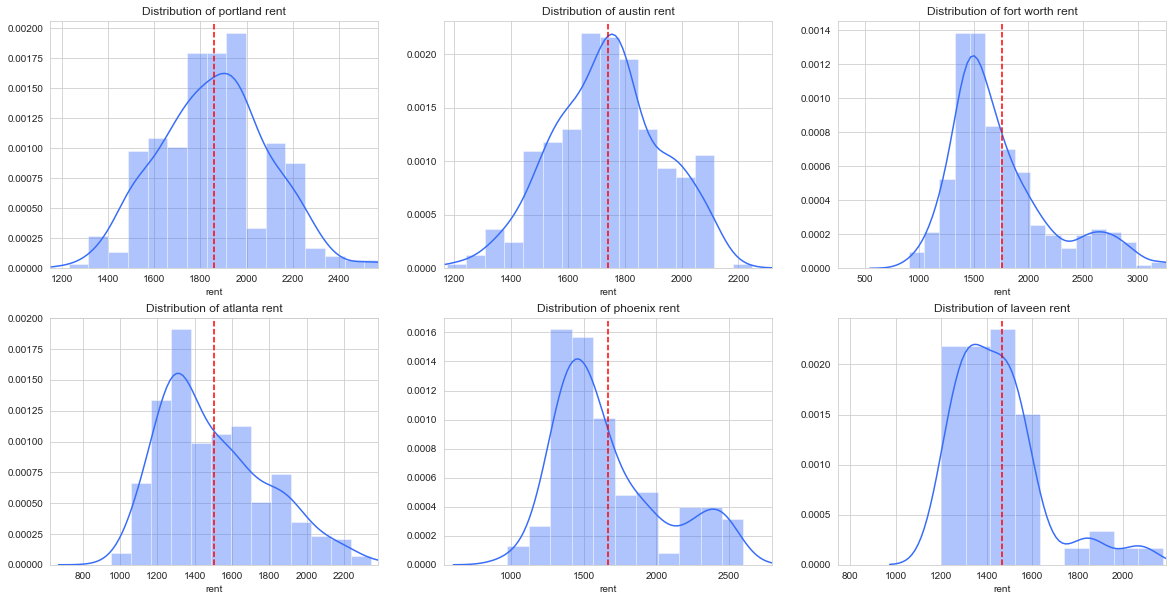

In [16]:
plot('rent')

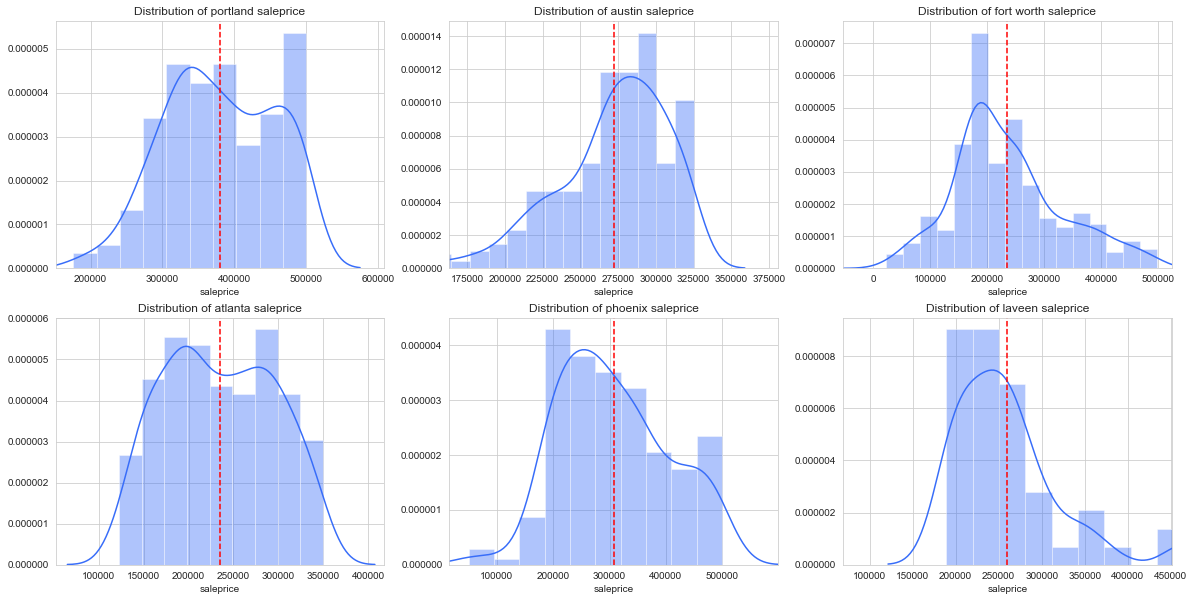

In [17]:
plot('saleprice')

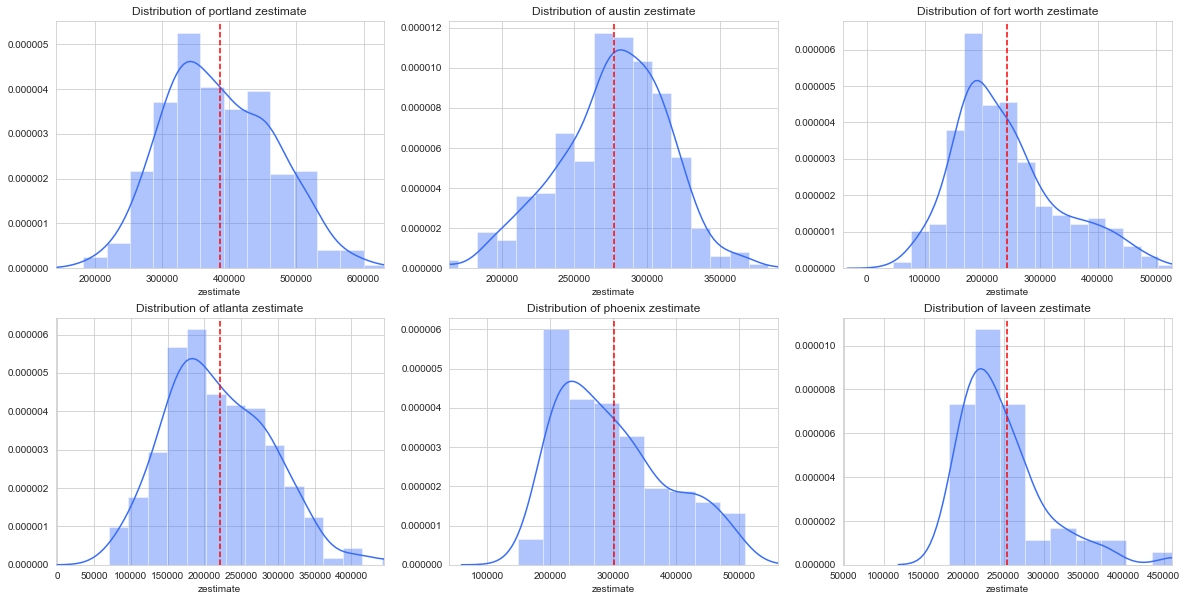

In [18]:
plot('zestimate')

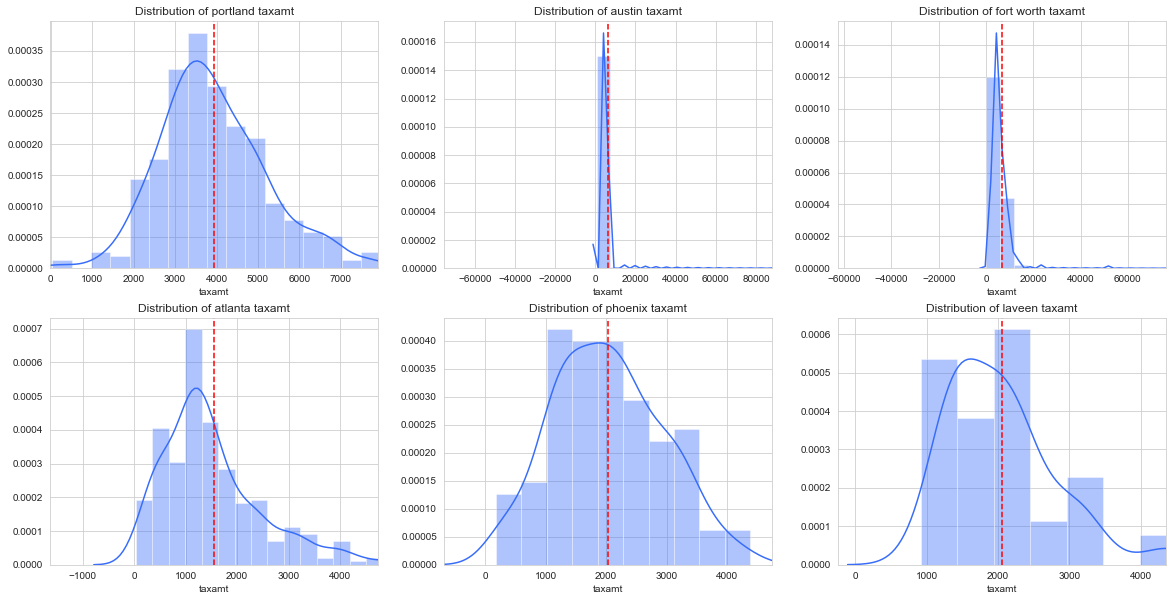

In [19]:
plot('taxamt')

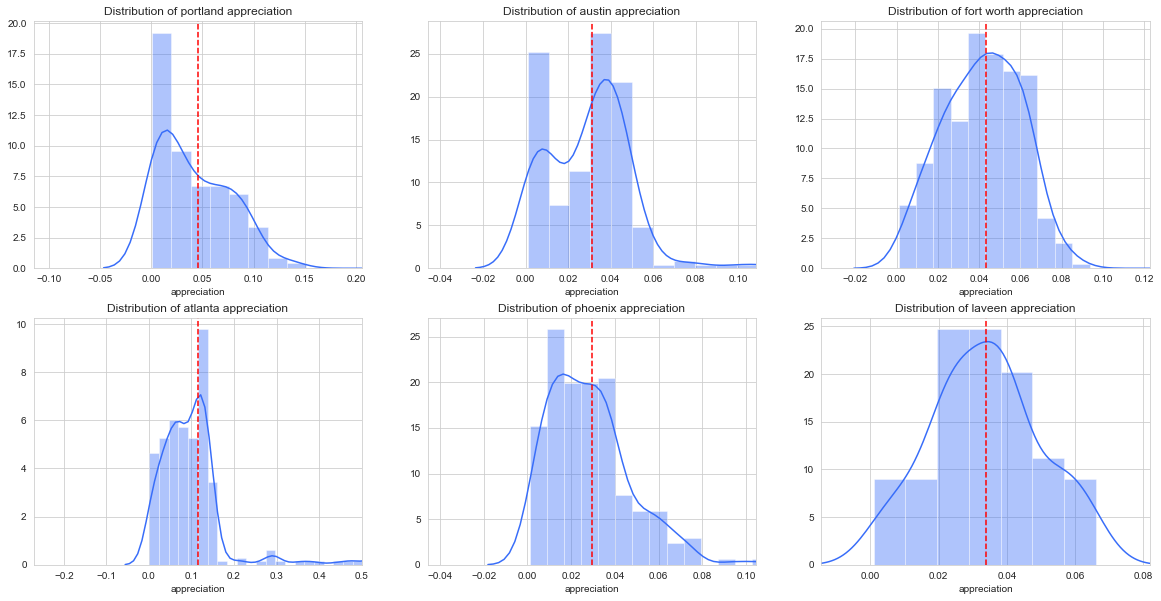

In [20]:
#Distribution of home value appreciation by city
plot('appreciation')

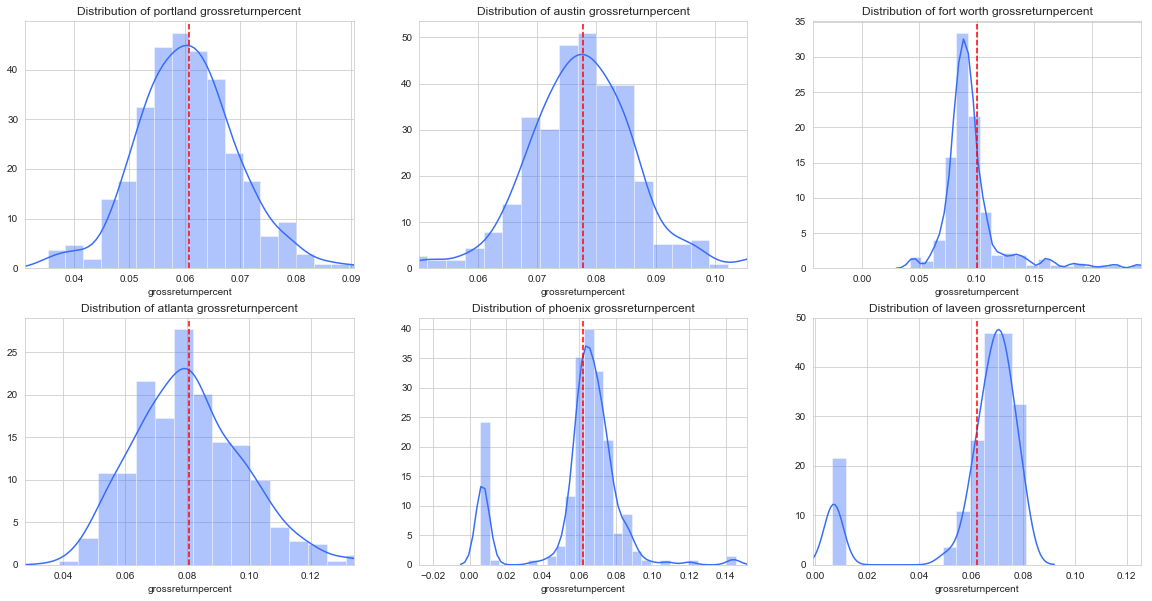

In [21]:
#This shows the expected gross returns from rental income
plot('grossreturnpercent')

# Taxes
When calculating how much property tax is due, home values are assessed by the county and a percentage value based on the county is applied to the assessed value. In some markets, assessed value differs wildly from the market price, and in other markets the opposite is true.

Lets look at how tax assessment value differs from the estimated market value of the property.

In [ ]:
def plot(metric):
    cities = ['portland', 'austin', 'fort worth', 'atlanta', 'phoenix', 'laveen']
    plt.figure(figsize=(20,10))
    for i, c in enumerate(cities):
        mean = df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)&(df.zestimate<1000000)][metric].mean()
        std  = df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)&(df.zestimate<1000000)][metric].std()
        plt.subplot(2,3,i+1)
        sns.distplot(df[(df.city==c)&(df[metric]>0)&(df[metric]<1000000)][metric])
        plt.axvline(mean, color='r', linestyle='--')
        plt.title(f'Distribution of {c} {metric}')
        plt.xlim(mean-(3*std), mean+(3*std))
    plt.show()

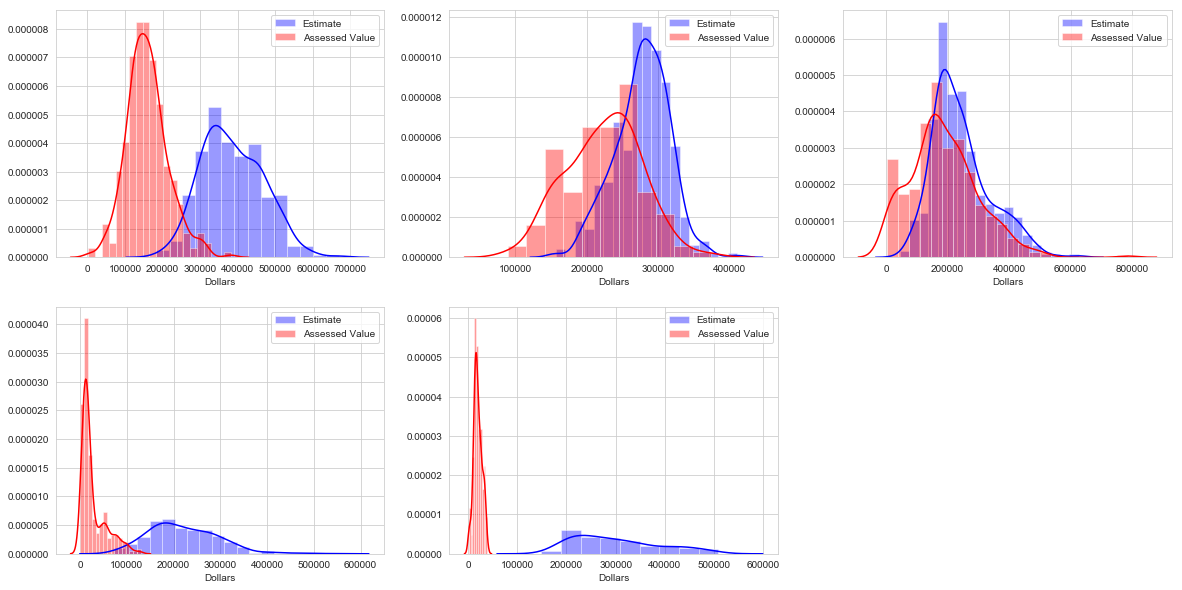

In [94]:
cities = ['portland', 'austin', 'fort worth', 'atlanta', 'phoenix']
plt.figure(figsize=(20,10))
for i, c in enumerate(cities):
    plt.subplot(2,3,i+1)
    sns.distplot(df[(df.city==c)&(df['zestimate']>0)&(df['zestimate']<1000000)]['zestimate'], color='blue', label='Estimate', norm_hist=True)
    sns.distplot(df[(df.city==c)&(df['assessedvalue']>0)&(df['assessedvalue']<1000000)]['assessedvalue'], color='red', label='Assessed Value', norm_hist=True)
    plt.xlabel('Dollars')
    plt.legend()